### 2. Data Cleaning and Imputation

#### Addressing missing data

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# path of the dataset
path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/ds_salaries_clean.csv")
# Load the dataset
salaries = pd.read_csv(path)

In [3]:
# See the quick summary of the dataset
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


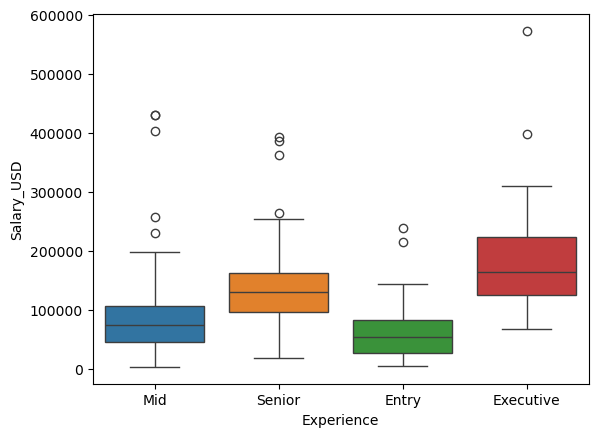

In [4]:
# Salary by experience level
sns.boxplot(data=salaries, x="Experience", y="Salary_USD", palette="tab10")
plt.show()

In [5]:
# checking for missing values
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [6]:
# Dropping missing values
threshold = len(salaries) * 0.05
threshold

30.35

In [7]:
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

#### Exercise - Addressing missing data

##### Dealing with missing data

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [8]:
plane_path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/planes.csv")
planes = pd.read_csv(plane_path)
planes.head(n=2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0


In [9]:
planes.shape

(10660, 11)

In [10]:
# Print the number of missing values in each column of the DataFrame.
planes.isnull().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [11]:
# Calculate how many observations five percent of the planes DataFrame is equal to.
# Lets define a threshold
threshold = len(planes) * 0.05
threshold

533.0

In [12]:
# Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
cols_to_drop = planes.columns[planes.isnull().sum() <= threshold]
cols_to_drop

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [13]:
# Use this filter to remove missing values and save the updated DataFrame.
planes.dropna(subset=cols_to_drop, inplace=True)

In [14]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

##### Strategies for remaining missing data

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

In [15]:
# Print the values and frequencies of "Additional_Info"
planes["Additional_Info"].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

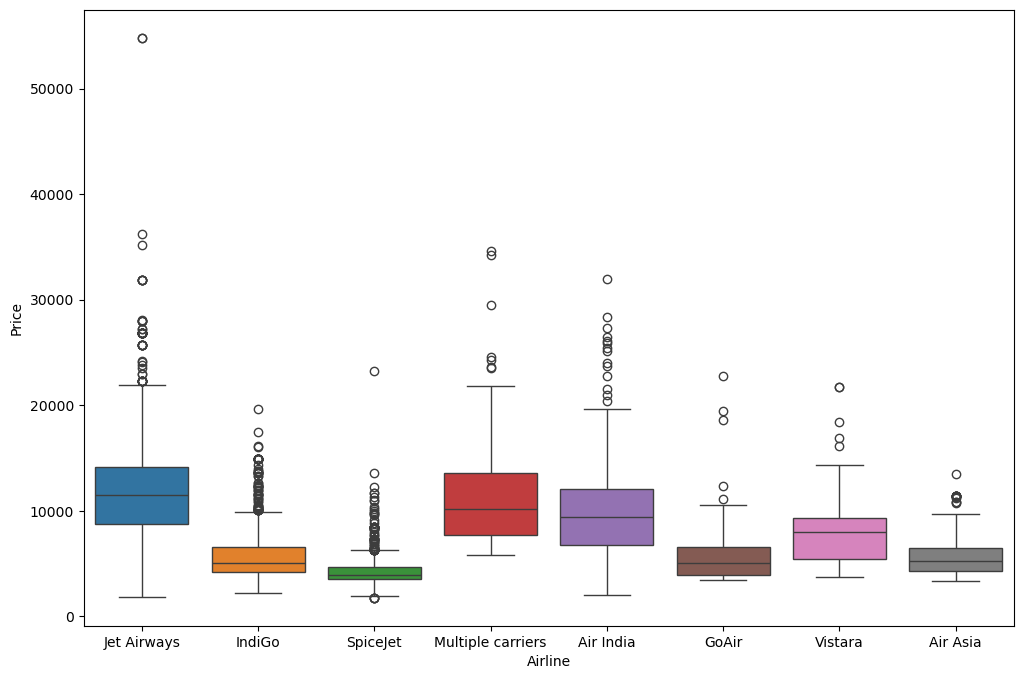

In [16]:
# Create a boxplot of "Price" versus "Airline".
plt.figure(figsize=(12, 8))
sns.boxplot(data=planes, x="Airline", y="Price", palette="tab10")
plt.show()

<Axes: xlabel='Price'>

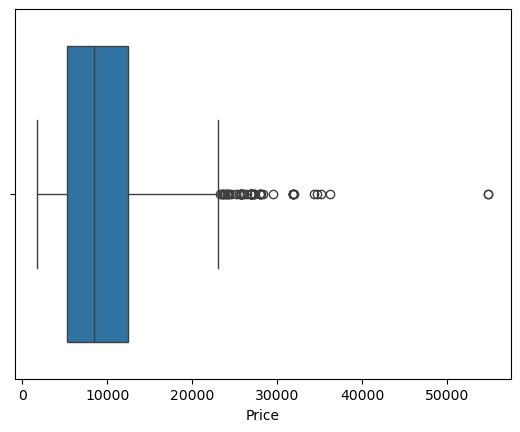

In [17]:
# this is for my understanding about the price 
sns.boxplot(data=planes, x="Price")

In [18]:
# How should you deal with the missing values in "Additional_Info" and "Price"?
# Ans : Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price"
planes.drop("Additional_Info", axis=1, inplace=True)

##### Imputing missing plane prices

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

In [19]:
# Group planes by airline and calculate the median price.
airline_prices = planes.groupby("Airline")["Price"].median()
airline_prices

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64

In [20]:
# Convert the grouped median prices to a dictionary.
prices_dict = airline_prices.to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5003.5,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10197.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

In [21]:
# Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

In [22]:
# check final is there any null values in dataset
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

#### Converting and analyzing categorical data

In [23]:
salaries.select_dtypes("object").head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [24]:
# Job titles
salaries["Designation"].value_counts()

Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                

In [25]:
# count unique job titles
salaries["Designation"].nunique()

50

In [26]:
salaries["Designation"]

0                  Data Scientist
1      Machine Learning Scientist
2               Big Data Engineer
3            Product Data Analyst
4       Machine Learning Engineer
                  ...            
602                 Data Engineer
603                 Data Engineer
604                  Data Analyst
605                  Data Analyst
606                  AI Scientist
Name: Designation, Length: 607, dtype: object

In [27]:
# Extracting value from categories using pandas.Series.str.contains()
salaries["Designation"].str.contains("Scientist")


0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [28]:
# Finding multiple phrases in string
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

In [29]:
# Words on intreset: Any that start with data
salaries["Designation"].str.contains("^Data")

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

In [30]:
job_categories = [
    "Data Scientist", "Data Analytics",
    "Data Engineering", "Machine Learning",
    "Managerial", "Consultant"
]

data_science = "Data Science|NLP"
data_analyst = "Analysit|Analytics"
data_engineer = "Data Engineer|ETL|Architech|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant="Consultant|Freelane"

conditions = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

salaries["Job_Category"] = np.select(conditions, 
                                    job_categories,
                                    default="Other")

In [31]:
salaries[["Designation", "Job_Category"]].head()

,Designation,Job_Category
0,Data Scientist,Other
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Other
4,Machine Learning Engineer,Machine Learning


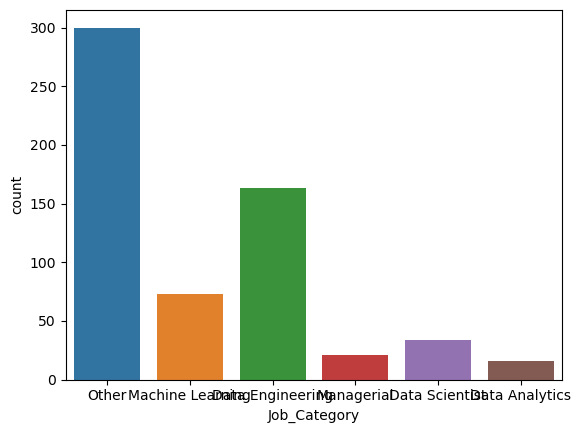

In [32]:
# visializing job category frequency
sns.countplot(data=salaries, x="Job_Category", palette="tab10")
plt.show()

#### Exercise - Converting and analyzing categorical data

##### Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [33]:
# Filter planes for columns that are of "object" data type.
non_numeric = planes.select_dtypes("object")
non_numeric

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop
...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop


In [34]:
# Loop through the columns in the dataset.
for feature in non_numeric.columns:
    print(feature)

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops


In [35]:
# Add the column iterator to the print statement, then call the function to return the number of unique values in the column.
for feature in non_numeric.columns:
    print(f"Number of unique values in {feature} column:", non_numeric[feature].nunique())

Number of unique values in Airline column: 8
Number of unique values in Date_of_Journey column: 44
Number of unique values in Source column: 5
Number of unique values in Destination column: 6
Number of unique values in Route column: 122
Number of unique values in Dep_Time column: 218
Number of unique values in Arrival_Time column: 1220
Number of unique values in Duration column: 362
Number of unique values in Total_Stops column: 5


##### Flight duration categories

As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

<pre>
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
</pre>

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [36]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [37]:
# Create a list of categories containing "Short-haul", "Medium", and "Long-haul".
flight_categories = ["Short-haul", "Medium", "Long-haul"]

In [38]:
# Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h" taking care to avoid values such as "10h".
# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"
planes["Duration"].str.contains(short_flights).value_counts()

Duration
False    5513
True     2995
Name: count, dtype: int64

In [39]:
# Create medium_flights to capture any values between five and nine hours.
medium_flights = "^5h|^6h|^7h|^8h|^9h"
planes["Duration"].str.contains(medium_flights).value_counts()

Duration
False    6790
True     1718
Name: count, dtype: int64

In [40]:
# Create long_flights to capture any values from 10 hours to 16 hours inclusive.
long_flights = "10h|11h|12h|13h|14h|15h|16h"
planes["Duration"].str.contains(long_flights).value_counts()

Duration
False    6594
True     1914
Name: count, dtype: int64

##### Adding duration categories

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

In [41]:
# Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

planes["Duration_Category"] = np.select(conditions,
                                       flight_categories,
                                       default="Extreme duration")

<Axes: xlabel='Duration_Category', ylabel='count'>

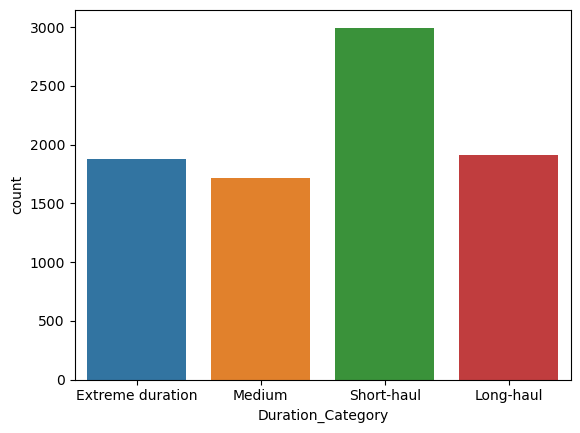

In [42]:
# Create a plot showing the count of each category.
sns.countplot(data=planes, x="Duration_Category", palette="tab10")

In [43]:
planes["Duration"]

0            19h
1         5h 25m
2         4h 45m
3         2h 25m
4        15h 30m
          ...   
10654     2h 40m
10655     2h 30m
10656     2h 35m
10658     2h 40m
10659     8h 20m
Name: Duration, Length: 8508, dtype: object

#### Working with numeric data

In [44]:
# The original salaries dataset
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


#### Exercise - Working with numeric data

##### Flight duration

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

In [45]:
# Print the first five values of the "Duration" column.
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [46]:
# Function to convert duration to float
def convert_duration(duration):
    hours = 0
    minutes = 0

    # Extract hours and minutes using regular expressions
    if "h" in duration:
        hours = int(duration.split("h")[0]) # get the hours before 'h'
    if "m" in duration:
        minutes = int(duration.split("h ")[-1].replace("m", "").strip()) # Get the minutes after 'h'

    # convert total time to hours
    return hours + minutes / 60

In [47]:
planes["Duration_in_hours"] = planes["Duration"].apply(convert_duration)

In [48]:
planes["Duration_in_hours"]

0        19.000000
1         5.416667
2         4.750000
3         2.416667
4        15.500000
           ...    
10654     2.666667
10655     2.500000
10656     2.583333
10658     2.666667
10659     8.333333
Name: Duration_in_hours, Length: 8508, dtype: float64

##### Adding descriptive statistics

Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [49]:
# # Price standard deviation by Airline
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [51]:
# Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration".
planes["airline_median_duration"] = planes.groupby("Airline")["Duration_in_hours"].transform(lambda x: x.median())

In [52]:
planes["airline_median_duration"]

0        13.333333
1         2.916667
2         2.916667
3         2.500000
4        13.333333
           ...    
10654     2.500000
10655     2.833333
10656    15.500000
10658     3.166667
10659    15.500000
Name: airline_median_duration, Length: 8508, dtype: float64

In [53]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


In [54]:
# for my test
planes["Destination"].unique()

array(['Cochin', 'Banglore', 'New Delhi', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [65]:
planes[["Destination", "Price"]].groupby("Destination")["Price"].mean()

Destination
Banglore      9093.622872
Cochin       10473.585927
Delhi         5248.541082
Hyderabad     5190.274021
Kolkata       4907.156863
New Delhi    11579.306944
Name: Price, dtype: float64

In [68]:
planes[["Destination", "Price"]].groupby("Destination")["Price"].transform(lambda x: x.mean())

0        10473.585927
1         9093.622872
2        11579.306944
3         9093.622872
4        11579.306944
             ...     
10654     5248.541082
10655     9093.622872
10656     9093.622872
10658    11579.306944
10659    10473.585927
Name: Price, Length: 8508, dtype: float64

In [69]:
planes[["Destination", "Price"]].groupby("Destination")["Price"].transform(lambda x: x.mean()).value_counts()

Price
10473.585927    3631
9093.622872     2291
5248.541082      998
11579.306944     720
5190.274021      562
4907.156863      306
Name: count, dtype: int64

In [70]:
data = {
    "Destination": ["New York", "Los Angeles", "New York", "Chicago", "Los Angeles"],
    "Price": [300, 250, 350, 200, 300]
}

planes = pd.DataFrame(data)

In [71]:
mean_prices = planes[["Destination", "Price"]].groupby("Destination")["Price"].mean()
print(mean_prices)

Destination
Chicago        200.0
Los Angeles    275.0
New York       325.0
Name: Price, dtype: float64


In [85]:
planes["mean_prices_transformed"] = planes[["Destination", "Price"]].groupby("Destination")["Price"].transform(lambda x: x.mean())
planes[["Destination", "mean_prices_transformed"]]

,Destination,mean_prices_transformed
0,New York,325.0
1,Los Angeles,275.0
2,New York,325.0
3,Chicago,200.0
4,Los Angeles,275.0


#### Handling outliers

In [90]:
salaries["Salary_USD"].describe()

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

- using the interquartile range(IQR)
- IQR = 75th - 25th percentile(q3 - q1)

<Axes: ylabel='Salary_USD'>

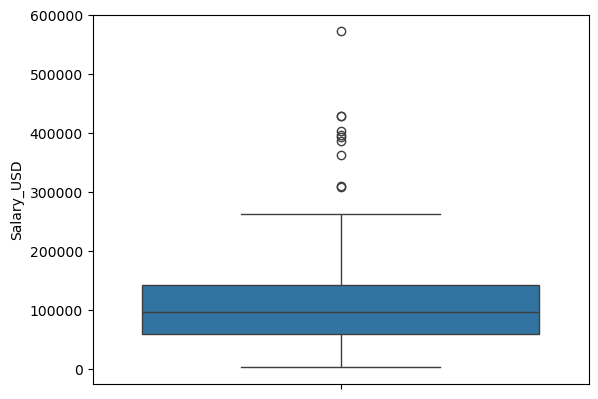

In [95]:
# IQR in box plots
sns.boxplot(data=salaries, y="Salary_USD")

- Upper Outliers > 75th percentile + (1.5*IQR)
- lower Outliers < 25th percentile - (1.5*IQR)

In [98]:
# identifying thresholds
# 75th Percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
seventy_fifth

143225.0

In [99]:
# 25th Percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
twenty_fifth

59893.0

In [100]:
# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth
salaries_iqr

83332.0

In [101]:
# identifing outliers
upper = seventy_fifth + (1.5 * salaries_iqr)
lower = twenty_fifth - (1.5 * salaries_iqr)

print(f"Upper Limit = {upper}")
print(f"Lower Limit = {lower}")

Upper Limit = 268223.0
Lower Limit = -65105.0


In [119]:
# Subsetting our data
salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)] \
    [["Experience", "Employee_Location", "Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


In [120]:
# lets deop Outliers
no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]
no_outliers

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Other
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Other
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Machine Learning
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0,Data Engineering
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0,Data Engineering
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0,Other
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0,Other


In [121]:
no_outliers.describe()

,Working_Year,Remote_Working_Ratio,Salary_USD
count,597.000000,597.000000,597.000000
mean,2021.412060,70.686767,102328.480737
std,0.688634,40.797800,55910.790653
min,2020.000000,0.000000,2730.000000
25%,2021.000000,50.000000,59819.000000
50%,2022.000000,100.000000,95483.000000
75%,2022.000000,100.000000,141565.000000
max,2022.000000,100.000000,263534.000000


<Axes: xlabel='Salary_USD', ylabel='Count'>

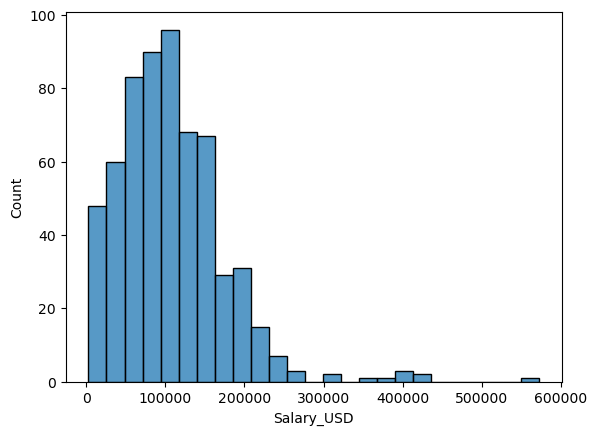

In [126]:
sns.histplot(data=salaries, x="Salary_USD", bins=25)

<Axes: xlabel='Salary_USD', ylabel='Count'>

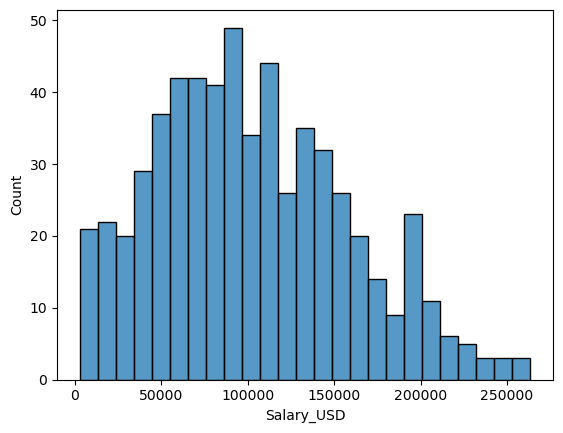

In [127]:
sns.histplot(data=no_outliers, x="Salary_USD", bins=25)

#### Exercise - Handling Outliers

##### Identifying outliers

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the "Price" or "Duration" columns of the planes DataFrame.

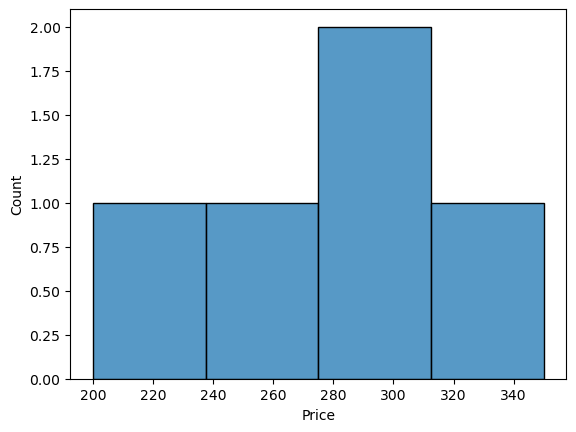

In [128]:
# Plot the distribution of "Price" column from planes.
sns.histplot(data=planes, x="Price")
plt.show()

In [129]:
# Display the descriptive statistics for flight duration.
planes["Duration"].describe()

KeyError: 'Duration'

##### Removing outliers

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "Price" is not an outlier.

Therefore, you need to find the upper threshold and then use it to remove values above this from the planes DataFrame.

In [130]:
# Find the 75th and 25th percentiles, saving as price_seventy_fifth and price_twenty_fifth respectively.
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

In [131]:
# Calculate the IQR, storing it as prices_iqr.
prices_iqr = price_seventy_fifth - price_twenty_fifth

In [132]:
# Calculate the upper and lower outlier thresholds.
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

In [133]:
# Remove the outliers from planes.
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]
print(planes["Price"].describe())


count      5.000000
mean     280.000000
std       57.008771
min      200.000000
25%      250.000000
50%      300.000000
75%      300.000000
max      350.000000
Name: Price, dtype: float64
